In [10]:
#euclidean distance is what this algo is all about
#sum to n, n is number of dimension in data (sigma of below)
# i starts off at 1, its ur actual dimension ur on
#(qi - pi)^2 q is one point, p is different point
# and take the square root of all of it, outside the sigma
#q and p are coordinates, x and y pairs, 2 dimensions

# euclidean distance is sqrt((x1-x2)^2+(y1-y2)^2) for 2 points

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings # tell user when using a dumb number for K
style.use('ggplot')

plot1 = [1,3]
plot2 = [2,5]

# numpy is faster and can do more dimensions than this but this looks less complicated
eculidean_d = sqrt((plot1[0]-plot2[0])**2+ (plot1[1]-plot2[1])**2)
print(eculidean_d)



2.23606797749979


r


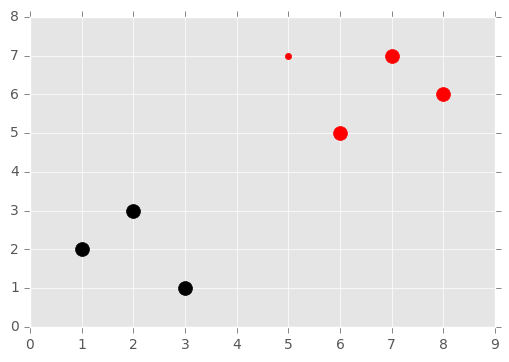

In [42]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
# features are 2 dimensional, classes k and r
# r and k are the labels, what we determine the data point belongs to based on the fatures
# each list is feature list for that individual

new_features = [5,7]





# length of dictionary is amount of keys
def k_nearest(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups')
    distances = []
    for group in data: # each class
        for features in data[group]: #each point in that class
            #euclidean distance, of every point and our prediction point 
            ed = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([ed, group]) # add every point and their distance to that list 
    
    # sort distances, take first k values
    votes = [i[1] for i in sorted(distances)[:k]]
    # return most common group, and how many there were (effect of [0][0], indexing most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0] # (1) - only care about the 1 most common group
    # confidence = Counter(votes).most_common(1)[0][1]/k # [1] is how many, more confident if closer to k 
    return vote_result

result = k_nearest(dataset, new_features, k =3)
print(result)

# problem with k nearest neighbors is u have to check against every single datapoint
# using inside or outside radius is a fix to this but this is the problem with the algo

# graphing
for i in dataset:
    for j in dataset[i]:
        plt.scatter(j[0],j[1], s=100, color = i) #plt.scatter takes x and y as parameters
# ^this loop is the same as saying [[plt.scatter(j[0],j[1], s=100, color = i) for j in dataset[i]] for i in dataset]
# work way from most inner statements out

plt.scatter(new_features[0], new_features[1], color = result) # clas of result is 'r', for red in matplotlib
plt.show()

In [46]:
#testing using the breast cancer dataset 
import pandas as pd 
import random # so we can shuffle this ourselves, no library

df = pd.read_csv('/Users/chrisosufsen/Desktop/datasets/Breast-cancer-wisconsin-data.txt') 
df.replace('?', -99999, inplace = True), # k nearest bad at handling outliers, na's here are ?s 
df.drop(['id'],1,inplace = True) # id has nothing to do with classification 
df.head()

#make sure everything is a float (or int, usually float tho)
#and turn each row into a list, this is a list of lists
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)

#our version of train test split 
test_size = 0.2 
train_set = {2:[], 4:[]} 
test_set = {2:[], 4:[]} 
train_data = full_data[:-int(test_size*len(full_data))] 
test_data = full_data[-int(test_size*len(full_data)):] # last 20% of data

#populate data 
for i in train_data: 
    train_set[i[-1]].append(i[:-1])
for i in test_data: 
    test_set[i[-1]].append(i[:-1])

    
correct = 0 
total = 0

for group in test_set: #each of these, 2 and 4 
    for data in test_set[group]: 
        vote = k_nearest(train_set, data, k=75) 
        if group == vote: 
            correct += 1 
        total += 1 
print("accuracy", correct/total)

accuracy 0.9136690647482014


In [ ]:
# k nearest can be threaded: dont have to test each prediction point
# can test each on their own, canheavily thread on a bulk of predictions
# scikit learn is faster, equally as accurate as our algorithm
# ^ can use radius concept
# knn can run on nonlinear data